<img src=data/header.png>

# Recommendations for First Time Single-Family Home Buyers in King County, WA

**Authors:** Annie Zheng & Albert Chen
***

## Overview & Business Problem 

Our stakeholders are a King County real estate agency and families looking to purchase their very first home. They are looking to find what underlying factors are critical to the perfect home and how these factors may affect the sale price. 

Purchasing a home is a huge step in one's life and a big undertaking that requires significant forethought, especially if the home is for a family. Our analysis will provide recommendations and provide assistance to first time single-family home buyers by looking into critically values home features and factors they should focus on in their home journey. Livable square footage, building grade, and condition grade were the focal points of this analysis. By analyzing the correlation of these factors to the price of the home, families can use these results to make an informed purchase with confidence for their very first home to plant their roots within King County, Washington.

<img src=data/seattleking.png>

## The Bottom Line

1. Settle down _out_ of Seattle.

2. Bigger homes available at a lower price out of Seattle.

3. Better construction and quality comes at a higher price. Better prices out of Seattle.

## Data Understanding

The data used in this analysis was taken from [King County Department of Assessments](https://info.kingcounty.gov/assessor/DataDownload/default.aspx), whereas the `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). The data provided information such as sale price, sale and renovation years, square footage of specific home features, as well as number of bedroomd and bathrooms. The target variable in our analysis was the sale price of the home which laid a foundation for the rest of the analysis and modeling. The dataset contains numerical data, with the instances of categorical data which is then converted into numerical data. Our final dataset had numerous fixed factors as well as the removal of price outliers. 

In [1]:
# Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import folium

from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

In [2]:
# Import dataset
data = pd.read_csv("data/kc_house_data.csv")
data

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0          7140     1.0         NO        NO  ...       PUBLIC       1180   
1          6703     1.0         NO        NO  ...       PUBLIC       1570   
2          6156     1.0         NO        NO  ...       PUBLIC       1580   
3          1400     2.0         NO        NO  ...       PUBLIC       1090   
4           758     2.0         NO        NO  ...       PUBLIC       1120   
...         ...     ...        ...       ...  ...          ...        ...   
30150      4000     1.5         NO        NO  ...       PUBLIC       1600   
30151      5800     2.0         NO        NO  ...       PUBLIC       2020   
30152      3600     1.0         NO        NO  ...       PUBLIC        940   
30153      2889     2.0         NO        NO  ...       PUBLIC       1830   
30154     11058     1.0         NO        NO  ...       PUBLIC       1200   

      sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0                 0           0         40     1969             0   
1              1570           0        240     1950             0   
2              1580           0          0     1956             0   
3              1070         200        270     2010             0   
4               550         550         30     2012             0   
...             ...         ...        ...      ...           ...   
30150          1130           0        210     1921             0   
30151             0           0        520     2011             0   
30152           920         240        110     1995             0   
30153           740         480        100     2006             0   
30154             0         420          0     1965             0   

                                                 address        lat       long  
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2      8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  
...                                                  ...        ...        ...  
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740 -122.32940  
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610 -122.38851  
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395 -122.29585  
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490 -122.18908  
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840 -122.32634  

[30155 rows x 25 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.034184 -0.006306  -0.012094    -0.027932 -0.119101   
price         -0.034184  1.000000  0.289204   0.480401     0.608521  0.085730   
bedrooms      -0.006306  0.289204  1.000000   0.589273     0.637874  0.003306   
bathrooms     -0.012094  0.480401  0.589273   1.000000     0.772677  0.035886   
sqft_living   -0.027932  0.608521  0.637874   0.772677     1.000000  0.119563   
sqft_lot      -0.119101  0.085730  0.003306   0.035886     0.119563  1.000000   
floors         0.032043  0.180576  0.147592   0.404412     0.304240 -0.032097   
sqft_above    -0.023216  0.538651  0.547164   0.674924     0.883984  0.129231   
sqft_basement -0.014662  0.245058  0.238502   0.260902     0.338460  0.004111   
sqft_garage   -0.007829  0.264169  0.319441   0.457022     0.511740  0.087169   
sqft_patio    -0.041625  0.313409  0.183439   0.327551     0.396030  0.155250   
yr_built       0.023071  0.096013  0.146191   0.443648     0.291694  0.001750   
yr_renovated  -0.029131  0.084786  0.014286   0.040631     0.038499  0.010049   
lat           -0.000691  0.063632  0.108758  -0.005225     0.102186  0.030020   
long           0.000479 -0.022509 -0.106689   0.017400    -0.087669 -0.034308   

                 floors  sqft_above  sqft_basement  sqft_garage  sqft_patio  \
id             0.032043   -0.023216      -0.014662    -0.007829   -0.041625   
price          0.180576    0.538651       0.245058     0.264169    0.313409   
bedrooms       0.147592    0.547164       0.238502     0.319441    0.183439   
bathrooms      0.404412    0.674924       0.260902     0.457022    0.327551   
sqft_living    0.304240    0.883984       0.338460     0.511740    0.396030   
sqft_lot      -0.032097    0.129231       0.004111     0.087169    0.155250   
floors         1.000000    0.448281      -0.248093     0.132656    0.125183   
sqft_above     0.448281    1.000000      -0.066801     0.560551    0.312117   
sqft_basement -0.248093   -0.066801       1.000000     0.026361    0.210500   
sqft_garage    0.132656    0.560551       0.026361     1.000000    0.216354   
sqft_patio     0.125183    0.312117       0.210500     0.216354    1.000000   
yr_built       0.544646    0.387448      -0.230226     0.447560    0.138409   
yr_renovated  -0.025449    0.010598       0.053634    -0.098603    0.056385   
lat           -0.218554    0.092258       0.059788     0.092346   -0.019724   
long           0.233781   -0.082744      -0.045208    -0.096861    0.025699   

               yr_built  yr_renovated       lat      long  
id             0.023071     -0.029131 -0.000691  0.000479  
price          0.096013      0.084786  0.063632 -0.022509  
bedrooms       0.146191      0.014286  0.108758 -0.106689  
bathrooms      0.443648      0.040631 -0.005225  0.017400  
sqft_living    0.291694      0.038499  0.102186 -0.087669  
sqft_lot       0.001750      0.010049  0.030020 -0.034308  
floors         0.544646     -0.025449 -0.218554  0.233781  
sqft_above     0.387448      0.010598  0.092258 -0.082744  
sqft_basement -0.230226      0.053634  0.059788 -0.045208  
sqft_garage    0.447560     -0.098603  0.092346 -0.096861  
sqft_patio     0.138409      0.056385 -0.019724  0.025699  
yr_built       1.000000     -0.239284 -0.207186  0.209878  
yr_renovated  -0.239284      1.000000  0.036956 -0.035631  
lat           -0.207186      0.036956  1.000000 -0.760766  
long           0.209878     -0.035631 -0.760766  1.000000

# Initial Look at Data to Get Information

In [5]:
data['sqft_above'].value_counts()

1200    282
1300    282
1060    271
1100    268
1250    265
       ... 
1799      1
1783      1
1767      1
7700      1
2049      1
Name: sqft_above, Length: 1187, dtype: int64

In [6]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [7]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [8]:
data['sewer_system'].isnull().sum()

14

# Data Cleaning

- One duplicate in ID, a few nulls in 'sewer_system' and 'heat_source', could drop these since there are only a few.

### Dropping the duplicated ID

In [9]:
# Check for duplicates
data[data.duplicated(subset=['id'])]

id       date      price  bedrooms  bathrooms  sqft_living  \
4846  1233100736  9/28/2021  2600000.0         3        4.0         3500   

      sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
4846      8455     2.0         NO        NO  ...       PUBLIC       2590   

     sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
4846          1410         500        290     2019             0   

                                                address       lat        long  
4846  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  

[1 rows x 25 columns]

In [10]:
# Verify that duplicate is actually a duplicate
data[data['id'].isin(['1233100736'])]

id       date      price  bedrooms  bathrooms  sqft_living  \
4845  1233100736  9/28/2021  2600000.0         3        4.0         3500   
4846  1233100736  9/28/2021  2600000.0         3        4.0         3500   

      sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
4845      8455     2.0         NO        NO  ...       PUBLIC       2590   
4846      8455     2.0         NO        NO  ...       PUBLIC       2590   

     sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
4845          1410         500        290     2019             0   
4846          1410         500        290     2019             0   

                                                address       lat        long  
4845  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  
4846  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  

[2 rows x 25 columns]

In [11]:
# Dropping duplicate row
data_clean = data.drop_duplicates(subset = ['id'])
data_clean

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0          7140     1.0         NO        NO  ...       PUBLIC       1180   
1          6703     1.0         NO        NO  ...       PUBLIC       1570   
2          6156     1.0         NO        NO  ...       PUBLIC       1580   
3          1400     2.0         NO        NO  ...       PUBLIC       1090   
4           758     2.0         NO        NO  ...       PUBLIC       1120   
...         ...     ...        ...       ...  ...          ...        ...   
30150      4000     1.5         NO        NO  ...       PUBLIC       1600   
30151      5800     2.0         NO        NO  ...       PUBLIC       2020   
30152      3600     1.0         NO        NO  ...       PUBLIC        940   
30153      2889     2.0         NO        NO  ...       PUBLIC       1830   
30154     11058     1.0         NO        NO  ...       PUBLIC       1200   

      sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0                 0           0         40     1969             0   
1              1570           0        240     1950             0   
2              1580           0          0     1956             0   
3              1070         200        270     2010             0   
4               550         550         30     2012             0   
...             ...         ...        ...      ...           ...   
30150          1130           0        210     1921             0   
30151             0           0        520     2011             0   
30152           920         240        110     1995             0   
30153           740         480        100     2006             0   
30154             0         420          0     1965             0   

                                                 address        lat       long  
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2      8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  
...                                                  ...        ...        ...  
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740 -122.32940  
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610 -122.38851  
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395 -122.29585  
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490 -122.18908  
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840 -122.32634  

[30154 rows x 25 columns]

### Removing the nulls from 'sewer_System' and 'heat_source'

In [12]:
#Drop columns with missing data
data_clean = data_clean.dropna(subset=['sewer_system', 'heat_source'])
data_clean

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0          7140     1.0         NO        NO  ...       PUBLIC       1180   
1          6703     1.0         NO        NO  ...       PUBLIC       1570   
2          6156     1.0         NO        NO  ...       PUBLIC       1580   
3          1400     2.0         NO        NO  ...       PUBLIC       1090   
4           758     2.0         NO        NO  ...       PUBLIC       1120   
...         ...     ...        ...       ...  ...          ...        ...   
30150      4000     1.5         NO        NO  ...       PUBLIC       1600   
30151      5800     2.0         NO        NO  ...       PUBLIC       2020   
30152      3600     1.0         NO        NO  ...       PUBLIC        940   
30153      2889     2.0         NO        NO  ...       PUBLIC       1830   
30154     11058     1.0         NO        NO  ...       PUBLIC       1200   

      sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0                 0           0         40     1969             0   
1              1570           0        240     1950             0   
2              1580           0          0     1956             0   
3              1070         200        270     2010             0   
4               550         550         30     2012             0   
...             ...         ...        ...      ...           ...   
30150          1130           0        210     1921             0   
30151             0           0        520     2011             0   
30152           920         240        110     1995             0   
30153           740         480        100     2006             0   
30154             0         420          0     1965             0   

                                                 address        lat       long  
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2      8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  
...                                                  ...        ...        ...  
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740 -122.32940  
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610 -122.38851  
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395 -122.29585  
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490 -122.18908  
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840 -122.32634  

[30110 rows x 25 columns]

We have elected to drop the rows with missing data instead of imputing it because there are only 3 rows with missing values. 

# Separating Out Zipcode from the Address
- We wanted to use address to separate out the zip codes of this data set to see if we could draw any insights.

In [13]:
data_clean['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30110, dtype: object

In [14]:
# This creates a new column with our zipcodes of the houses
data_clean['postal_code'] = data_clean['address'].str[-20:-15]
data_clean

<ipython-input-14-ad923d199017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['postal_code'] = data_clean['address'].str[-20:-15]


id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sqft_above sqft_basement  \
0          7140     1.0         NO        NO  ...       1180             0   
1          6703     1.0         NO        NO  ...       1570          1570   
2          6156     1.0         NO        NO  ...       1580          1580   
3          1400     2.0         NO        NO  ...       1090          1070   
4           758     2.0         NO        NO  ...       1120           550   
...         ...     ...        ...       ...  ...        ...           ...   
30150      4000     1.5         NO        NO  ...       1600          1130   
30151      5800     2.0         NO        NO  ...       2020             0   
30152      3600     1.0         NO        NO  ...        940           920   
30153      2889     2.0         NO        NO  ...       1830           740   
30154     11058     1.0         NO        NO  ...       1200             0   

      sqft_garage sqft_patio yr_built yr_renovated  \
0               0         40     1969            0   
1               0        240     1950            0   
2               0          0     1956            0   
3             200        270     2010            0   
4             550         30     2012            0   
...           ...        ...      ...          ...   
30150           0        210     1921            0   
30151           0        520     2011            0   
30152         240        110     1995            0   
30153         480        100     2006            0   
30154         420          0     1965            0   

                                                 address        lat  \
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975   
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525   
2      8504 South 113th Street, Seattle, Washington 9...  47.502045   
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110   
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470   
...                                                  ...        ...   
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740   
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610   
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395   
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490   
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840   

            long  postal_code  
0     -122.19052        98055  
1     -122.35591        98133  
2     -122.22520        98178  
3     -122.29020        98118  
4     -122.07188        98027  
...          ...          ...  
30150 -122.32940        98103  
30151 -122.38851        98116  
30152 -122.29585        98122  
30153 -122.18908        98055  
30154 -122.32634        98148  

[30110 rows x 26 columns]

In [15]:
# Verify no missing values -- sanity check 
data_clean.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
postal_code      0
dtype: int64

### Any homes not within King County?

In [16]:
data_clean['postal_code'].value_counts(normalize=True)

98042    0.032946
98038    0.028462
98103    0.025274
98115    0.025241
98117    0.024842
           ...   
98422    0.000033
15010    0.000033
32609    0.000033
95205    0.000033
72751    0.000033
Name: postal_code, Length: 399, dtype: float64

It appears that addresses within King's County begin with Postal Code '98'. Are there any that don't being with '98'? Let's find out. 

In [17]:
# Find any postal codes not within King County
prefixes = ['98']

data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))]

id        date      price  bedrooms  bathrooms  sqft_living  \
12     1797501124   6/25/2021   750000.0         3        2.0         1280   
53     7548300606    5/3/2022   960000.0         3        2.0         1280   
62     1934800106   8/24/2021   740000.0         2        2.0         1120   
159     856000595    7/8/2021  3730000.0         4        4.5         4820   
172    1336300219    2/9/2022   759900.0         2        2.0          960   
...           ...         ...        ...       ...        ...          ...   
30029  1978200468  10/28/2021  1480000.0         3        2.0         2050   
30044  9834201391   2/17/2022   520000.0         2        2.0          790   
30116  2768100152    1/1/2022   710000.0         1        2.0         1180   
30129  8584800130  11/18/2021   940000.0         2        2.0         1550   
30144  2267000442   12/1/2021   729950.0         2        2.0         1290   

       sqft_lot  floors waterfront greenbelt  ... sqft_above sqft_basement  \
12          964     3.0         NO        NO  ...       1280             0   
53         1221     2.0         NO        NO  ...        980           300   
62          734     3.0         NO        NO  ...       1120             0   
159       10800     2.0         NO        NO  ...       4820             0   
172         591     3.0         NO        NO  ...        960             0   
...         ...     ...        ...       ...  ...        ...           ...   
30029      1090     3.5         NO        NO  ...       1920           490   
30044       597     2.0         NO        NO  ...        520           270   
30116       616     3.0         NO        NO  ...        840           340   
30129      1026     2.5         NO        NO  ...       1310           470   
30144       720     3.0         NO        NO  ...       1180           360   

      sqft_garage sqft_patio yr_built yr_renovated  \
12              0        380     2021            0   
53              0        400     2019            0   
62              0        260     2021            0   
159           850          0     2006            0   
172             0        240     2021            0   
...           ...        ...      ...          ...   
30029         360        240     2021            0   
30044           0        210     2021            0   
30116           0        330     2021            0   
30129         230          0     2009            0   
30144         250        360     2021            0   

                                                 address        lat  \
12     5712 A Street, Omaha, Nebraska 68106, United S...  41.225811   
53     1820 South State Street, Vineland, New Jersey ...  39.460807   
62     1804 Spruce Street, McLeansboro, Illinois 6285...  38.075870   
159    626 13th Street, Union City, New Jersey 07087,...  40.761325   
172    11th Avenue, West Babylon, New York 11704, Uni...  40.719455   
...                                                  ...        ...   
30029  Avenue Cuts, 34 Ridge Rd, North Arlington, New...  40.782453   
30044  36th Avenue, Kenosha, Wisconsin 53142, United ...  42.548430   
30116  57th Street Lane NW, Rochester, Minnesota 5590...  44.081760   
30129  214 B, Mount Laurel, New Jersey 08054, United ...  39.955820   
30144  2954 Northwest 85th Street, Miami, Florida 331...  25.851697   

            long  postal_code  
12    -96.001397        68106  
53    -75.015361        08360  
62    -88.535760        62859  
159   -74.039020        07087  
172   -73.371935        11704  
...          ...          ...  
30029 -74.137642        07031  
30044 -87.851900        53142  
30116 -92.524610        55901  
30129 -74.881130        08054  
30144 -80.237790        33147  

[911 rows x 26 columns]

There are 911 rows that are not within the King's County area whose postal code does not being with '98'. Let's drop these homes from our dataset and focus on those solely within the county.

In [18]:
# Find the indexes of the homes not within King County
prefixes = ['98']
non_king_postals = data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))].index
non_king_postals

# Drop the rows whose postal code does not being with '98'
only_king = data_clean.drop(non_king_postals)
only_king.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sqft_above sqft_basement  \
0      7140     1.0         NO        NO  ...       1180             0   
1      6703     1.0         NO        NO  ...       1570          1570   
2      6156     1.0         NO        NO  ...       1580          1580   
3      1400     2.0         NO        NO  ...       1090          1070   
4       758     2.0         NO        NO  ...       1120           550   

  sqft_garage sqft_patio yr_built yr_renovated  \
0           0         40     1969            0   
1           0        240     1950            0   
2           0          0     1956            0   
3         200        270     2010            0   
4         550         30     2012            0   

                                             address        lat       long  \
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052   
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591   
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520   
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020   
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188   

   postal_code  
0        98055  
1        98133  
2        98178  
3        98118  
4        98027  

[5 rows x 26 columns]

There might still be some zipcodes present within the dataset that are not within King's County, but are in a neighboring county whose postal code also begins with '98', but let's hone our data some more. 

# Creating new columns from existing data

### Numeric grade value column

In [19]:
only_king['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [20]:
#To get numeric grade code value
only_king['grade_code'] = only_king['grade'].str[0:2]

#To strip whitespace from the grade code
only_king['grade_code'] = only_king['grade_code'].str.strip()

In [21]:
#sanity check to make sure no white space
only_king['grade_code'].unique()

array(['7', '9', '8', '6', '10', '5', '11', '12', '4', '13', '3', '2'],
      dtype=object)

### Numeric condition value column

In [22]:
#To get numeric condition code
only_king['condition_code'] = only_king['condition']

# Replace the word to numeric value
only_king.condition_code.replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4,'Very Good': 5}, inplace=True)

### Converting Data Types of New Columns

In [23]:
#change postal code to numeric datatype
only_king['postal_code'] = only_king['postal_code'].astype(int)

#To convert to float
only_king['condition_code'] = only_king['condition_code'].astype(int)

#To convert to float
only_king['grade_code'] = only_king['grade_code'].astype(int)

### Feature engineering 
- We want to know the price per sqft of livable sqft to see if we can draw any insights from this. Typically when analyzing pricing of houses, it is a useful metric to have the cost per square foot.

In [24]:
only_king['price_sqft'] = only_king['price'] / only_king['sqft_living']
only_king

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
0          7140     1.0         NO        NO  ...         40     1969   
1          6703     1.0         NO        NO  ...        240     1950   
2          6156     1.0         NO        NO  ...          0     1956   
3          1400     2.0         NO        NO  ...        270     2010   
4           758     2.0         NO        NO  ...         30     2012   
...         ...     ...        ...       ...  ...        ...      ...   
30150      4000     1.5         NO        NO  ...        210     1921   
30151      5800     2.0         NO        NO  ...        520     2011   
30152      3600     1.0         NO        NO  ...        110     1995   
30153      2889     2.0         NO        NO  ...        100     2006   
30154     11058     1.0         NO        NO  ...          0     1965   

      yr_renovated                                            address  \
0                0  2102 Southeast 21st Court, Renton, Washington ...   
1                0  11231 Greenwood Avenue North, Seattle, Washing...   
2                0  8504 South 113th Street, Seattle, Washington 9...   
3                0  4079 Letitia Avenue South, Seattle, Washington...   
4                0  2193 Northwest Talus Drive, Issaquah, Washingt...   
...            ...                                                ...   
30150            0  4673 Eastern Avenue North, Seattle, Washington...   
30151            0  4131 44th Avenue Southwest, Seattle, Washingto...   
30152            0  910 Martin Luther King Jr Way, Seattle, Washin...   
30153            0  17127 114th Avenue Southeast, Renton, Washingt...   
30154            0  18615 7th Avenue South, Burien, Washington 981...   

             lat       long  postal_code  grade_code  condition_code  \
0      47.461975 -122.19052        98055           7               4   
1      47.711525 -122.35591        98133           7               3   
2      47.502045 -122.22520        98178           7               3   
3      47.566110 -122.29020        98118           9               3   
4      47.532470 -122.07188        98027           7               3   
...          ...        ...          ...         ...             ...   
30150  47.664740 -122.32940        98103           8               4   
30151  47.565610 -122.38851        98116           7               3   
30152  47.610395 -122.29585        98122           7               3   
30153  47.449490 -122.18908        98055           8               3   
30154  47.435840 -122.32634        98148           7               3   

       price_sqft  
0      572.033898  
1      332.129964  
2      107.986111  
3      358.796296  
4      529.017857  
...           ...  
30150  814.136126  
30151  650.000000  
30152  493.827160  
30153  301.556420  
30154  416.666667  

[29199 rows x 29 columns]

In [25]:
only_king['price_sqft'].describe()

count     29199.000000
mean        558.055358
std        3541.243279
min           6.920415
25%         357.754755
50%         487.654321
75%         641.876179
max      601000.000000
Name: price_sqft, dtype: float64

### Cleaning 'price' to get rid of outliers
- We utilize the Interqurtile range to rid outliers via the formula
- Below: Q1 - 1.5 IQR
- Above: Q3 + 1.5 IQR
- IQR = Q3 – Q1

In [26]:
only_king['price'].describe()

count    2.919900e+04
mean     1.112959e+06
std      8.954250e+05
min      2.736000e+04
25%      6.450000e+05
50%      8.680000e+05
75%      1.310000e+06
max      3.075000e+07
Name: price, dtype: float64

In [27]:
# Calculate Q1, Q2, Q3 and IQR
Q1 = np.percentile(only_king['price'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(only_king['price'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(only_king['price'], 75, interpolation = 'midpoint') 

print('Q1 25 percentile of the given data is, ', Q1)
print('Q2 50 percentile of the given data is, ', Q2)
print('Q3 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range (IQR) is', IQR)

Q1 25 percentile of the given data is,  645000.0
Q2 50 percentile of the given data is,  868000.0
Q3 75 percentile of the given data is,  1310000.0
Interquartile range (IQR) is 665000.0


In [28]:
# Find the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is', lower_limit)
print('Upper limit is', upper_limit)

Lower limit is -352500.0
Upper limit is 2307500.0


In [29]:
# Locate the homes greater than the upper limit
only_king[only_king['price'] >= 2307500]

id        date      price  bedrooms  bathrooms  sqft_living  \
27     5424700190   2/26/2022  4500000.0         4        3.0         2760   
36     1925059107   6/29/2021  2450000.0         4        3.5         2300   
43     1726059053   3/22/2022  3850000.0         5        3.5         4180   
84     6865200085    3/7/2022  2500000.0         4        3.5         3120   
118    5425700191  12/15/2021  3000000.0         3        1.5         2040   
...           ...         ...        ...       ...        ...          ...   
30100  3582050010   4/21/2022  2588000.0         5        4.5         3580   
30106  7588700215   4/11/2022  2875000.0         3        2.0         1900   
30126  1087500050  11/30/2021  3754500.0         4        5.5         5200   
30130  5456000475    3/9/2022  2435000.0         5        3.0         3920   
30140  8081900170   3/29/2022  2650000.0         4        3.5         3270   

       sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
27        13150     1.5         NO        NO  ...        160     1954   
36         8370     2.0         NO        NO  ...        110     1950   
43       209959     1.0         NO        NO  ...          0     2016   
84         3801     2.0         NO        NO  ...        380     2021   
118       14284     1.0         NO        NO  ...          0     1952   
...         ...     ...        ...       ...  ...        ...      ...   
30100      5719     2.0         NO        NO  ...        220     2019   
30106      8800     1.0         NO        NO  ...         80     1953   
30126     10790     2.0         NO        NO  ...        400     2021   
30130      8414     1.0         NO        NO  ...        350     1954   
30140      9200     2.0         NO        NO  ...         40     1925   

      yr_renovated                                            address  \
27               0  8637 Northeast 6th Street, Medina, Washington ...   
36            1995  9411 Northeast 32nd Street, Clyde Hill, Washin...   
43               0  10919 Northeast 164th Lane, Bothell, Washingto...   
84               0  1305 North 50th Street, Seattle, Washington 98...   
118              0  2539 82nd Avenue Northeast, Medina, Washington...   
...            ...                                                ...   
30100            0  21802 Southeast 5th Place, Sammamish, Washingt...   
30106            0  8322 16th Avenue Northwest, Seattle, Washingto...   
30126            0  12237 Northeast 66th Street, Kirkland, Washing...   
30130            0  9823 Mercerwood Drive, Mercer Island, Washingt...   
30140            0  3303 Northwest 72nd Street, Seattle, Washingto...   

             lat        long  postal_code  grade_code  condition_code  \
27     47.615710 -122.223990        98039           9               4   
36     47.639005 -122.214107        98004           9               3   
43     47.745460 -122.194980        98011           8               3   
84     47.664785 -122.341635        98103           8               3   
118    47.633020 -122.232570        98039           7               4   
...          ...         ...          ...         ...             ...   
30100  47.604675 -122.048760        98074           9               3   
30106  47.689410 -122.377560        98117           8               3   
30126  47.664625 -122.175870        98033          10               3   
30130  47.573195 -122.207510        98040           9               4   
30140  47.680710 -122.400025        98117           9               4   

        price_sqft  
27     1630.434783  
36     1065.217391  
43      921.052632  
84      801.282051  
118    1470.588235  
...            ...  
30100   722.905028  
30106  1513.157895  
30126   722.019231  
30130   621.173469  
30140   810.397554  

[1874 rows x 29 columns]

There are 1874 rows of data that have housing pricing greater than $2,307,500.

In [30]:
#Create a copy dataset
df_clean = only_king.copy()

#Filter out the homes beyond the upper limit of price
df_clean = df_clean[df_clean['price'] <= 2307500]
df_clean

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
0          7140     1.0         NO        NO  ...         40     1969   
1          6703     1.0         NO        NO  ...        240     1950   
2          6156     1.0         NO        NO  ...          0     1956   
3          1400     2.0         NO        NO  ...        270     2010   
4           758     2.0         NO        NO  ...         30     2012   
...         ...     ...        ...       ...  ...        ...      ...   
30150      4000     1.5         NO        NO  ...        210     1921   
30151      5800     2.0         NO        NO  ...        520     2011   
30152      3600     1.0         NO        NO  ...        110     1995   
30153      2889     2.0         NO        NO  ...        100     2006   
30154     11058     1.0         NO        NO  ...          0     1965   

      yr_renovated                                            address  \
0                0  2102 Southeast 21st Court, Renton, Washington ...   
1                0  11231 Greenwood Avenue North, Seattle, Washing...   
2                0  8504 South 113th Street, Seattle, Washington 9...   
3                0  4079 Letitia Avenue South, Seattle, Washington...   
4                0  2193 Northwest Talus Drive, Issaquah, Washingt...   
...            ...                                                ...   
30150            0  4673 Eastern Avenue North, Seattle, Washington...   
30151            0  4131 44th Avenue Southwest, Seattle, Washingto...   
30152            0  910 Martin Luther King Jr Way, Seattle, Washin...   
30153            0  17127 114th Avenue Southeast, Renton, Washingt...   
30154            0  18615 7th Avenue South, Burien, Washington 981...   

             lat       long  postal_code  grade_code  condition_code  \
0      47.461975 -122.19052        98055           7               4   
1      47.711525 -122.35591        98133           7               3   
2      47.502045 -122.22520        98178           7               3   
3      47.566110 -122.29020        98118           9               3   
4      47.532470 -122.07188        98027           7               3   
...          ...        ...          ...         ...             ...   
30150  47.664740 -122.32940        98103           8               4   
30151  47.565610 -122.38851        98116           7               3   
30152  47.610395 -122.29585        98122           7               3   
30153  47.449490 -122.18908        98055           8               3   
30154  47.435840 -122.32634        98148           7               3   

       price_sqft  
0      572.033898  
1      332.129964  
2      107.986111  
3      358.796296  
4      529.017857  
...           ...  
30150  814.136126  
30151  650.000000  
30152  493.827160  
30153  301.556420  
30154  416.666667  

[27325 rows x 29 columns]

In [31]:
df_clean['price'].median()

835000.0

In [32]:
# Wanted to see where price/sqft was equal to 601k
df_clean.loc[df_clean['price_sqft'] == 601000]

id        date      price  bedrooms  bathrooms  sqft_living  \
14977  1549500215  12/17/2021  1803000.0         4        4.0            3   

       sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
14977    326701     2.0         NO        NO  ...          0     2021   

      yr_renovated                                            address  \
14977            0  31072 Northeast 165th Street, Duvall, Washingt...   

            lat       long  postal_code  grade_code  condition_code  \
14977  47.74529 -121.92362        98019           9               3   

       price_sqft  
14977    601000.0  

[1 rows x 29 columns]

### Filter Criteria
Since this is for a family, we want:
- at least 2 bedrooms
- at least 1 bathroom
- only one floor
- houses built after 1977 due to the asbestos ban
- building grade of 6 and above
- condition code of 3 and above

In [33]:
# Wanted to get an idea of our data set size if we find the homes with at least 2 bedrooms and at least one bathroom
df_clean[(df_clean['bedrooms'] >= 2) & (df_clean['bathrooms'] >= 1)]

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
0          7140     1.0         NO        NO  ...         40     1969   
1          6703     1.0         NO        NO  ...        240     1950   
2          6156     1.0         NO        NO  ...          0     1956   
3          1400     2.0         NO        NO  ...        270     2010   
4           758     2.0         NO        NO  ...         30     2012   
...         ...     ...        ...       ...  ...        ...      ...   
30150      4000     1.5         NO        NO  ...        210     1921   
30151      5800     2.0         NO        NO  ...        520     2011   
30152      3600     1.0         NO        NO  ...        110     1995   
30153      2889     2.0         NO        NO  ...        100     2006   
30154     11058     1.0         NO        NO  ...          0     1965   

      yr_renovated                                            address  \
0                0  2102 Southeast 21st Court, Renton, Washington ...   
1                0  11231 Greenwood Avenue North, Seattle, Washing...   
2                0  8504 South 113th Street, Seattle, Washington 9...   
3                0  4079 Letitia Avenue South, Seattle, Washington...   
4                0  2193 Northwest Talus Drive, Issaquah, Washingt...   
...            ...                                                ...   
30150            0  4673 Eastern Avenue North, Seattle, Washington...   
30151            0  4131 44th Avenue Southwest, Seattle, Washingto...   
30152            0  910 Martin Luther King Jr Way, Seattle, Washin...   
30153            0  17127 114th Avenue Southeast, Renton, Washingt...   
30154            0  18615 7th Avenue South, Burien, Washington 981...   

             lat       long  postal_code  grade_code  condition_code  \
0      47.461975 -122.19052        98055           7               4   
1      47.711525 -122.35591        98133           7               3   
2      47.502045 -122.22520        98178           7               3   
3      47.566110 -122.29020        98118           9               3   
4      47.532470 -122.07188        98027           7               3   
...          ...        ...          ...         ...             ...   
30150  47.664740 -122.32940        98103           8               4   
30151  47.565610 -122.38851        98116           7               3   
30152  47.610395 -122.29585        98122           7               3   
30153  47.449490 -122.18908        98055           8               3   
30154  47.435840 -122.32634        98148           7               3   

       price_sqft  
0      572.033898  
1      332.129964  
2      107.986111  
3      358.796296  
4      529.017857  
...           ...  
30150  814.136126  
30151  650.000000  
30152  493.827160  
30153  301.556420  
30154  416.666667  

[26932 rows x 29 columns]

In [34]:
# Filter out homes with less than 2 bedrooms 
df_clean = df_clean[df_clean['bedrooms'] >= 2]

Filtered to home with at least two rooms to ensure that the house is suiteable for a single family home, one room for the parents and one room for the children.

In [35]:
# Filter out the homes with less than 1 bathroom
df_clean = df_clean[df_clean['bathrooms'] >=1]

Filtered to homes with atleast one full bath. A place to both shower and use the toilet is important! 

In [36]:
# Filter to homes with only 1 floor
df_clean = df_clean[df_clean['floors'] == 1]

Filtered to homes with only 1 floor to focus on the safety of children. Stairs can be scary!

In [37]:
# Filter out homes built after 1977
df_clean = df_clean[df_clean['yr_built'] > 1977]

The use of asbestos was banned in 1977. We have filtered the dataset to homes built after 1977 to ensure the house does not contain any asbestos.

In [38]:
# Filter to homes that meet building codes - Grade 6 or higher
df_clean = df_clean[df_clean['grade_code'] >= 6]

Building grade of 6 is the lowest grade that meets building codes. We want to make sure the house is of code and can surpass inspection.

In [39]:
# Filter to homes that are of average and above quality - Condition grade 3 or higher
df_clean = df_clean[df_clean['condition_code'] >= 3]

Filtered to homes with condition code of 3 or above to focus on homes that were of Average and above condition. 

In [40]:
df_clean['condition_code'].unique()

array([4, 3, 5])

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 21 to 30152
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2731 non-null   int64  
 1   date            2731 non-null   object 
 2   price           2731 non-null   float64
 3   bedrooms        2731 non-null   int64  
 4   bathrooms       2731 non-null   float64
 5   sqft_living     2731 non-null   int64  
 6   sqft_lot        2731 non-null   int64  
 7   floors          2731 non-null   float64
 8   waterfront      2731 non-null   object 
 9   greenbelt       2731 non-null   object 
 10  nuisance        2731 non-null   object 
 11  view            2731 non-null   object 
 12  condition       2731 non-null   object 
 13  grade           2731 non-null   object 
 14  heat_source     2731 non-null   object 
 15  sewer_system    2731 non-null   object 
 16  sqft_above      2731 non-null   int64  
 17  sqft_basement   2731 non-null  

In [42]:
df_clean['price'].describe()

count    2.731000e+03
mean     8.426668e+05
std      3.869865e+05
min      4.118100e+04
25%      5.700000e+05
50%      7.300000e+05
75%      1.011000e+06
max      2.301000e+06
Name: price, dtype: float64

In [43]:
df_clean['yr_built'].describe()

count    2731.000000
mean     1987.685829
std         9.918578
min      1978.000000
25%      1980.000000
50%      1985.000000
75%      1992.000000
max      2022.000000
Name: yr_built, dtype: float64

In [44]:
df_clean.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
21  2310000170  2/28/2022   750000.0         3        2.0         1590   
25  2095600170  10/8/2021   580000.0         3        3.0         2020   
26  8682282030   5/4/2022  2000000.0         3        3.0         2700   
34  5727500011  11/3/2021   785000.0         3        2.0         1350   
39  1421059003  8/25/2021  1680000.0         3        2.5         5200   

    sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
21      7754     1.0         NO       YES  ...          0     1990   
25      4482     1.0         NO        NO  ...        120     1992   
26      7694     1.0         NO        NO  ...        640     2006   
34      7354     1.0         NO        NO  ...        120     1985   
39    206039     1.0         NO        NO  ...        670     2007   

   yr_renovated                                            address        lat  \
21            0  27307 226th Avenue Southeast, Maple Valley, Wa...  47.357065   
25            0  22609 102nd Place Southeast, Kent, Washington ...  47.399470   
26            0  23837 NE Adair Rd, Redmond, Washington 98053, ...  47.708760   
34            0  16710 Meridian Avenue North, Shoreline, Washin...  47.751020   
39            0  15916 Southeast 326th Street, Auburn, Washingt...  47.310595   

         long  postal_code  grade_code  condition_code  price_sqft  
21 -122.04067        98038           7               4  471.698113  
25 -122.20413        98031           7               3  287.128713  
26 -122.02073        98053           9               3  740.740741  
34 -122.33447        98133           7               5  581.481481  
39 -122.12938        98092          10               3  323.076923  

[5 rows x 29 columns]

### Exported this cleaned dataset as a .csv, this will be our "master dataset"

In [45]:
df_clean.to_csv('data_cleaned.csv')

# Modeling with Dataset
- We now have our cleaned dataset and would like to model this utilizing sklearn.

In [46]:
df = pd.read_csv('data_cleaned.csv')

In [47]:
df = df.drop(df.columns[0], axis =1)

In [48]:
# Checked to see how the data looks after import
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2310000170  2/28/2022   750000.0         3        2.0         1590   
1  2095600170  10/8/2021   580000.0         3        3.0         2020   
2  8682282030   5/4/2022  2000000.0         3        3.0         2700   
3  5727500011  11/3/2021   785000.0         3        2.0         1350   
4  1421059003  8/25/2021  1680000.0         3        2.5         5200   

   sqft_lot  floors waterfront greenbelt  ... sqft_patio yr_built  \
0      7754     1.0         NO       YES  ...          0     1990   
1      4482     1.0         NO        NO  ...        120     1992   
2      7694     1.0         NO        NO  ...        640     2006   
3      7354     1.0         NO        NO  ...        120     1985   
4    206039     1.0         NO        NO  ...        670     2007   

  yr_renovated                                            address        lat  \
0            0  27307 226th Avenue Southeast, Maple Valley, Wa...  47.357065   
1            0  22609 102nd Place Southeast, Kent, Washington ...  47.399470   
2            0  23837 NE Adair Rd, Redmond, Washington 98053, ...  47.708760   
3            0  16710 Meridian Avenue North, Shoreline, Washin...  47.751020   
4            0  15916 Southeast 326th Street, Auburn, Washingt...  47.310595   

        long  postal_code  grade_code  condition_code  price_sqft  
0 -122.04067        98038           7               4  471.698113  
1 -122.20413        98031           7               3  287.128713  
2 -122.02073        98053           9               3  740.740741  
3 -122.33447        98133           7               5  581.481481  
4 -122.12938        98092          10               3  323.076923  

[5 rows x 29 columns]

In [49]:
# We dropped the variables that we are not interested in exploring
df = df.drop(columns=['date', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 
                                   'yr_renovated', 'sqft_above', 'sqft_basement', 'waterfront',
                                   'greenbelt', 'nuisance', 'view'])


In [50]:
# Sanity check that the columns were removed
df

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2310000170   750000.0         3        2.0         1590      7754   
1     2095600170   580000.0         3        3.0         2020      4482   
2     8682282030  2000000.0         3        3.0         2700      7694   
3     5727500011   785000.0         3        2.0         1350      7354   
4     1421059003  1680000.0         3        2.5         5200    206039   
...          ...        ...       ...        ...          ...       ...   
2726  3821400080   500000.0         3        2.5         1610      7250   
2727  1761100480   560000.0         3        2.0         1480      8770   
2728  2408100010  1011000.0         3        2.0         1460     10995   
2729  2539500005   880000.0         4        2.5         2260      5661   
2730  7960100080   800000.0         3        2.0         1620      3600   

      floors  sqft_garage  sqft_patio  yr_built        lat        long  \
0        1.0          440           0      1990  47.357065 -122.040670   
1        1.0          600         120      1992  47.399470 -122.204130   
2        1.0          530         640      2006  47.708760 -122.020730   
3        1.0          460         120      1985  47.751020 -122.334470   
4        1.0         1080         670      2007  47.310595 -122.129380   
...      ...          ...         ...       ...        ...         ...   
2726     1.0          490         270      1978  47.479820 -122.325620   
2727     1.0          540         180      1985  47.287330 -122.362055   
2728     1.0          460         180      1981  47.645550 -122.108060   
2729     1.0          460         230      2000  47.568800 -122.295505   
2730     1.0          240         110      1995  47.610395 -122.295850   

      postal_code  grade_code  condition_code  price_sqft  
0           98038           7               4  471.698113  
1           98031           7               3  287.128713  
2           98053           9               3  740.740741  
3           98133           7               5  581.481481  
4           98092          10               3  323.076923  
...           ...         ...             ...         ...  
2726        98168           7               3  310.559006  
2727        98023           7               4  378.378378  
2728        98052           8               3  692.465753  
2729        98108           8               3  389.380531  
2730        98122           7               3  493.827160  

[2731 rows x 16 columns]

### Scaling the data
- We know that the columns that interest us are not on all on the same scale (i.e number of bedrooms vs. price) Therefore we want to scale our data utilizing StandardScaler.

In [51]:
numbers_df = df.drop(['postal_code', 'lat', 'long'], axis=1)

In [52]:
scaled_df = StandardScaler().fit(numbers_df)
new_df = pd.DataFrame(scaled_df.transform(numbers_df), columns= numbers_df.columns)
new_df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    -0.788063 -0.239501 -0.397810  -0.593686    -0.513990 -0.289056     0.0   
1    -0.861512 -0.678874 -0.397810   1.098753     0.160401 -0.352063     0.0   
2     1.394924  2.991177 -0.397810   1.098753     1.226879 -0.290212     0.0   
3     0.382688 -0.149042 -0.397810  -0.593686    -0.890394 -0.296759     0.0   
4    -1.092593  2.164124 -0.397810   0.252533     5.147757  3.529187     0.0   
...        ...       ...       ...        ...          ...       ...     ...   
2726 -0.270295 -0.885637 -0.397810   0.252533    -0.482623 -0.298762     0.0   
2727 -0.976103 -0.730565 -0.397810  -0.593686    -0.686509 -0.269492     0.0   
2728 -0.754457  0.435064 -0.397810  -0.593686    -0.717876 -0.226647     0.0   
2729 -0.709442  0.096489  0.892475   0.252533     0.536805 -0.329360     0.0   
2730  1.147522 -0.110274 -0.397810  -0.593686    -0.466940 -0.369047     0.0   

      sqft_garage  sqft_patio  yr_built  grade_code  condition_code  \
0       -0.131216   -0.991004  0.233360   -0.634611        0.671764   
1        0.638273   -0.502750  0.435038   -0.634611       -0.824637   
2        0.301622    1.613017  1.846789    1.917852       -0.824637   
3       -0.035030   -0.502750 -0.270837   -0.634611        2.168164   
4        2.946741    1.735081  1.947629    3.194083       -0.824637   
...           ...         ...       ...         ...             ...   
2726     0.109249    0.107567 -0.976713   -0.634611       -0.824637   
2727     0.349715   -0.258623 -0.270837   -0.634611        0.671764   
2728    -0.035030   -0.258623 -0.674195    0.641620       -0.824637   
2729    -0.035030   -0.055184  1.241753    0.641620       -0.824637   
2730    -1.093078   -0.543438  0.737556   -0.634611       -0.824637   

      price_sqft  
0       0.127063  
1      -0.969872  
2       1.726040  
3       0.779529  
4      -0.756224  
...          ...  
2726   -0.830621  
2727   -0.427556  
2728    1.439132  
2729   -0.362168  
2730    0.258580  

[2731 rows x 13 columns]

In [53]:
# Taking a quick look at the correlation values
new_df.corr()

id     price  bedrooms  bathrooms  sqft_living  \
id              1.000000 -0.005142 -0.082049  -0.062077    -0.063376   
price          -0.005142  1.000000  0.176587   0.355532     0.544653   
bedrooms       -0.082049  0.176587  1.000000   0.553038     0.508079   
bathrooms      -0.062077  0.355532  0.553038   1.000000     0.649136   
sqft_living    -0.063376  0.544653  0.508079   0.649136     1.000000   
sqft_lot       -0.193448  0.174683  0.012522   0.053510     0.230482   
floors               NaN       NaN       NaN        NaN          NaN   
sqft_garage    -0.035101  0.220684  0.096532   0.241162     0.300379   
sqft_patio     -0.066855  0.273564  0.102776   0.230531     0.391423   
yr_built        0.037681  0.093806 -0.103216   0.045555     0.067360   
grade_code      0.008643  0.565316  0.156357   0.390016     0.631936   
condition_code -0.007347  0.028751  0.093316   0.042718     0.002068   
price_sqft      0.042539  0.673794 -0.224205  -0.145876    -0.195007   

                sqft_lot  floors  sqft_garage  sqft_patio  yr_built  \
id             -0.193448     NaN    -0.035101   -0.066855  0.037681   
price           0.174683     NaN     0.220684    0.273564  0.093806   
bedrooms        0.012522     NaN     0.096532    0.102776 -0.103216   
bathrooms       0.053510     NaN     0.241162    0.230531  0.045555   
sqft_living     0.230482     NaN     0.300379    0.391423  0.067360   
sqft_lot        1.000000     NaN     0.054536    0.178182  0.079642   
floors               NaN     NaN          NaN         NaN       NaN   
sqft_garage     0.054536     NaN     1.000000    0.140551  0.035149   
sqft_patio      0.178182     NaN     0.140551    1.000000 -0.038438   
yr_built        0.079642     NaN     0.035149   -0.038438  1.000000   
grade_code      0.149247     NaN     0.381374    0.274009  0.153512   
condition_code -0.021087     NaN    -0.033509    0.080422 -0.321085   
price_sqft      0.018756     NaN    -0.007028   -0.002558  0.047479   

                grade_code  condition_code  price_sqft  
id                0.008643       -0.007347    0.042539  
price             0.565316        0.028751    0.673794  
bedrooms          0.156357        0.093316   -0.224205  
bathrooms         0.390016        0.042718   -0.145876  
sqft_living       0.631936        0.002068   -0.195007  
sqft_lot          0.149247       -0.021087    0.018756  
floors                 NaN             NaN         NaN  
sqft_garage       0.381374       -0.033509   -0.007028  
sqft_patio        0.274009        0.080422   -0.002558  
yr_built          0.153512       -0.321085    0.047479  
grade_code        1.000000       -0.084171    0.113657  
condition_code   -0.084171        1.000000    0.035037  
price_sqft        0.113657        0.035037    1.000000

In [54]:
# Looking to see which variables have the highest correlation with 'price'
new_df.corr()['price'].map(abs).sort_values(ascending=False)

price             1.000000
price_sqft        0.673794
grade_code        0.565316
sqft_living       0.544653
bathrooms         0.355532
sqft_patio        0.273564
sqft_garage       0.220684
bedrooms          0.176587
sqft_lot          0.174683
yr_built          0.093806
condition_code    0.028751
id                0.005142
floors                 NaN
Name: price, dtype: float64

In [55]:
# Setting up our X and y for modeling
X = new_df.drop(columns = ['price', 'floors', 'id'])
y = new_df['price']

In [56]:
# Checking that our variables were scaled
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  sqft_garage  sqft_patio  \
0  -0.39781  -0.593686    -0.513990 -0.289056    -0.131216   -0.991004   
1  -0.39781   1.098753     0.160401 -0.352063     0.638273   -0.502750   
2  -0.39781   1.098753     1.226879 -0.290212     0.301622    1.613017   
3  -0.39781  -0.593686    -0.890394 -0.296759    -0.035030   -0.502750   
4  -0.39781   0.252533     5.147757  3.529187     2.946741    1.735081   

   yr_built  grade_code  condition_code  price_sqft  
0  0.233360   -0.634611        0.671764    0.127063  
1  0.435038   -0.634611       -0.824637   -0.969872  
2  1.846789    1.917852       -0.824637    1.726040  
3 -0.270837   -0.634611        2.168164    0.779529  
4  1.947629    3.194083       -0.824637   -0.756224

## Dummy Regressor Model

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1337)

dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_train, y_train)
dummy_regr.score(X_test, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train), squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 1.0

Baseline Model Test Score: -0.00032613851514340375
Baseline Model Test RMSE: 1.0


- This first model is pretty low, which is expected as it's the Dummy Regressor. Can only go up from here!

## Second Model
- We want to create a model with just one variable at first, testing our highest correlated feature, 'price_sqft'

In [58]:
X_train_second_model = X_train[['price_sqft']]
X_test_second_model = X_test[['price_sqft']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

second_model = LinearRegression()
second_model.fit(X_train_second_model,y_train)

second_model_scores = cross_validate(estimator=second_model, X=new_df[['sqft_living']], y=new_df.price, return_train_score=True, cv=splitter)

second_predict_train = second_model.predict(X_train_second_model)
second_predict_test = second_model.predict(X_test_second_model)

second_train_RMSE = MSE(y_train,second_predict_train,squared = False)
second_test_RMSE = MSE(y_test,second_predict_test, squared = False)

second_condition_num = sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().condition_number

print(f'Second Model Train score: {second_model_scores["train_score"].mean()}')
print(f'Second Model Train RMSE: {round(second_train_RMSE)}')
print(f'Second Model Train Condition Number: {second_condition_num}')
print()
print("Second Model Test score: ", second_model_scores["test_score"].mean())
print(f'Second Model Test RMSE: {round(second_test_RMSE)}')

Second Model Train score: 0.29754331375278764
Second Model Train RMSE: 1.0
Second Model Train Condition Number: 1.013016249467147

Second Model Test score:  0.29357221571611486
Second Model Test RMSE: 1.0


- The results of our second model show that there is a Root Mean Squared Error of approximately 1. We note that our values are scaled, so we need to look at what this means with regards to price. As such we need to check the summary statistics.

In [59]:
# Taking a look at 'price' summary statistics
numbers_df['price'].describe()

count    2.731000e+03
mean     8.426668e+05
std      3.869865e+05
min      4.118100e+04
25%      5.700000e+05
50%      7.300000e+05
75%      1.011000e+06
max      2.301000e+06
Name: price, dtype: float64

- An RSME of 1 std is suggesting that our model is off by approximately 1 standard deviation of price, or approximately 386,987 dollars. From our research we established that the median price of King County houses was approximately 780,000 dollars. We will keep this in mind as we continue modeling.

### Get the Coefficient from our Second Model
- We wanted to interpret the coefficient for this variable to see what it means for our price

In [60]:
# Find the coefficient value for 'price_sqft'
second_model.coef_

array([0.67459603])

In [61]:
df['price_sqft'].describe()

count    2731.000000
mean      450.318617
std       168.290002
min        22.943038
25%       335.714286
50%       418.139535
75%       542.151753
max      1707.317073
Name: price_sqft, dtype: float64

In [62]:
df['price'].describe()

count    2.731000e+03
mean     8.426668e+05
std      3.869865e+05
min      4.118100e+04
25%      5.700000e+05
50%      7.300000e+05
75%      1.011000e+06
max      2.301000e+06
Name: price, dtype: float64

### How to Interpret
- For each 1 std increase in price_sqft, we expect to see on average a .675 std increase in the price. (For every increase of 168 dollars/sqft, we expect on average the price to increase by approxmately 261,000 dollars)

### Checking Variance of Second Model

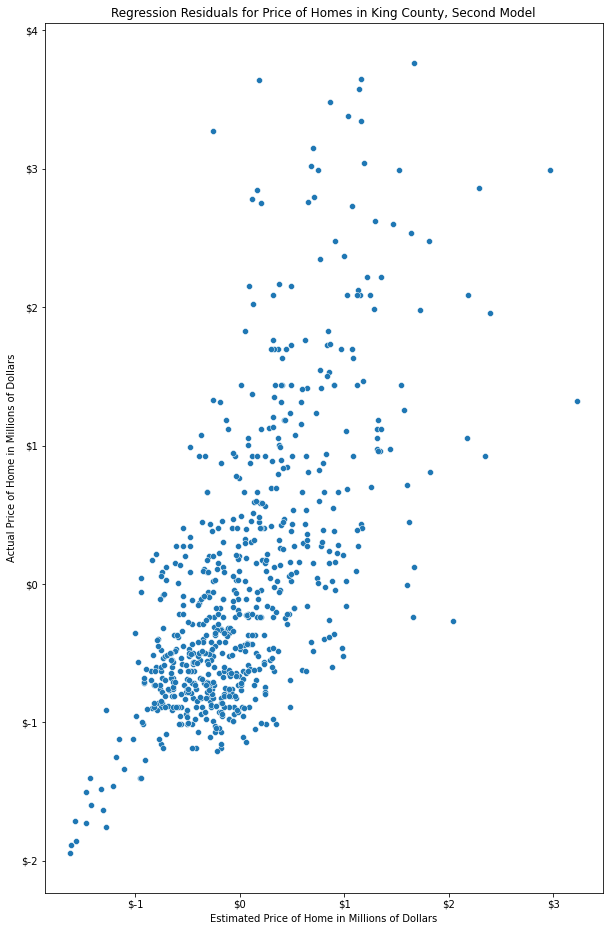

In [63]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = second_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Second Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

## Third Model 
- Wanted to plot more variables, 3 highest correlating to price, price/sqft, sqft living, and grade code.

In [64]:
X_train_third_model = X_train[['price_sqft','sqft_living', 'grade_code']]
X_test_third_model = X_test[['price_sqft','sqft_living','grade_code']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

third_model = LinearRegression()
third_model.fit(X_train_third_model,y_train)

third_model_scores = cross_validate(
    estimator=third_model,
    X=new_df[['price_sqft', 'sqft_living', 'grade_code']],
    y=new_df.price,
    return_train_score=True,
    cv=splitter
)

third_predict_train = third_model.predict(X_train_third_model)
third_predict_test = third_model.predict(X_test_third_model)

third_train_RMSE = MSE(y_train,third_predict_train,squared = False)
third_test_RMSE = MSE(y_test,third_predict_test, squared = False)

third_condition_num = sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().condition_number

print(f'Third Model Train score: {third_model_scores["train_score"].mean()}')
print(f'Third Model Train RMSE: {(third_train_RMSE)}')
print()
print(f'Third Model Train Condition Number: {third_condition_num}')
print()
print("Third Model Test score: ", third_model_scores["test_score"].mean())
print(f'Third Model Test RMSE: {(third_test_RMSE)}')

Third Model Train score: 0.9309081785724708
Third Model Train RMSE: 0.25989283442071814

Third Model Train Condition Number: 2.3167160847767625

Third Model Test score:  0.9297555396511165
Third Model Test RMSE: 0.273863401619033


### Checking Variance of Third Model

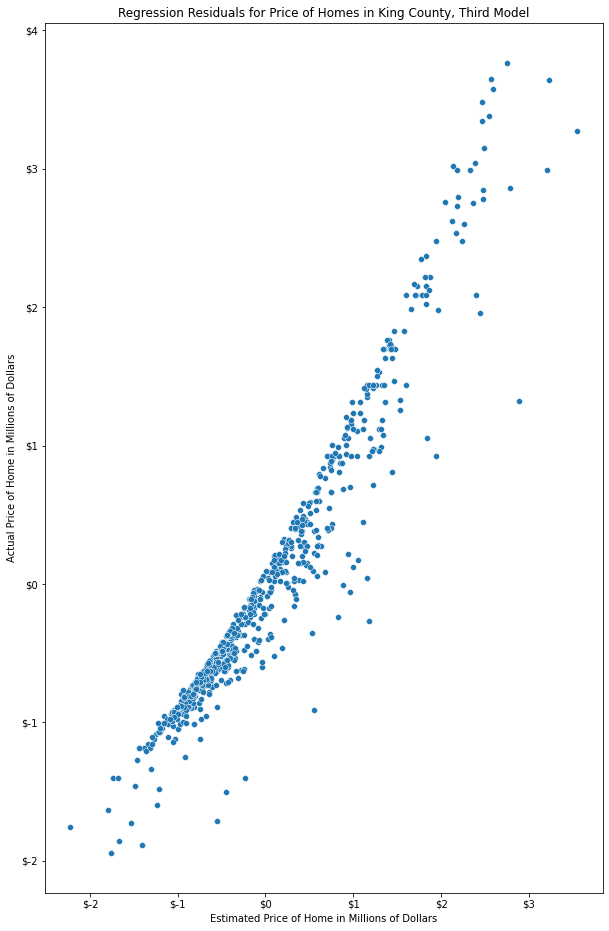

In [65]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = third_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Third Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

### Get the Coefficients from our Third Model

In [66]:
third_model.coef_

array([0.79261726, 0.65838925, 0.05401056])

In [67]:
df['price'].describe()

count    2.731000e+03
mean     8.426668e+05
std      3.869865e+05
min      4.118100e+04
25%      5.700000e+05
50%      7.300000e+05
75%      1.011000e+06
max      2.301000e+06
Name: price, dtype: float64

In [68]:
df['price_sqft'].describe()

count    2731.000000
mean      450.318617
std       168.290002
min        22.943038
25%       335.714286
50%       418.139535
75%       542.151753
max      1707.317073
Name: price_sqft, dtype: float64

In [69]:
df['sqft_living'].describe()

count    2731.000000
mean     1917.726474
std       637.729194
min       770.000000
25%      1460.000000
50%      1810.000000
75%      2245.000000
max      5490.000000
Name: sqft_living, dtype: float64

In [70]:
df['grade_code'].describe()

count    2731.000000
mean        7.497254
std         0.783701
min         6.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: grade_code, dtype: float64

### How to Interpret
For every:
- 168 dollars/sqft increase, we expect the price to increase by 307,000 dollars.
- 638 sqft increase in house size, we expect the price to increase by 255,000 dollars.
- .783 increase in grade code, we expect the price to increase by 21,000 dollars.

### Insights
- We observe that we have a high score of approximately 93%, indicated that 93% of the variance seen in our price is due to the three variables highlighted above.
- We believe this is due to multicolinearity between our variables, especially since our feature engineered feature utilizes price per square feet, and we also are modeling against square feet as well.

## Fourth Model
- We wanted to try modeling all the variables in our dataset to see if it would improve our score

In [71]:
X_train_fourth_model = X_train
X_test_fourth_model = X_test

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

fourth_model = LinearRegression()
fourth_model.fit(X_train_fourth_model,y_train)

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=new_df.drop(columns = 'price'),
    y=new_df.price,
    return_train_score=True,
    cv=splitter
)

fourth_predict_train = fourth_model.predict(X_train_fourth_model)
fourth_predict_test = fourth_model.predict(X_test_fourth_model)

fourth_train_RMSE = MSE(y_train,fourth_predict_train,squared = False)
fourth_test_RMSE = MSE(y_test,fourth_predict_test, squared = False)

fourth_condition_num = sm.OLS(y_train, sm.add_constant(X_train_fourth_model)).fit().condition_number

print(f'Fourth Model Train score: {fourth_model_scores["train_score"].mean()}')
print(f'Fourth Model Train RMSE: {(fourth_train_RMSE)}')
print()
print(f'Fourth Model Train Condition Number: {fourth_condition_num}')
print()
print("Fourth Model Test score: ", fourth_model_scores["test_score"].mean())
print(f'Fourth Model Test RMSE: {(fourth_test_RMSE)}')

Fourth Model Train score: 0.9316003923381965
Fourth Model Train RMSE: 0.25883060687297554

Fourth Model Train Condition Number: 3.7020437513046143

Fourth Model Test score:  0.9298050860104968
Fourth Model Test RMSE: 0.2738572846156539


- We can compare our score values and they are similar to our third model, however we see that our condition number has increased. We believe that this indicates that there is multicolinearity between our variables as suggested in our previous example.

### Checking the Variance of Fourth Model

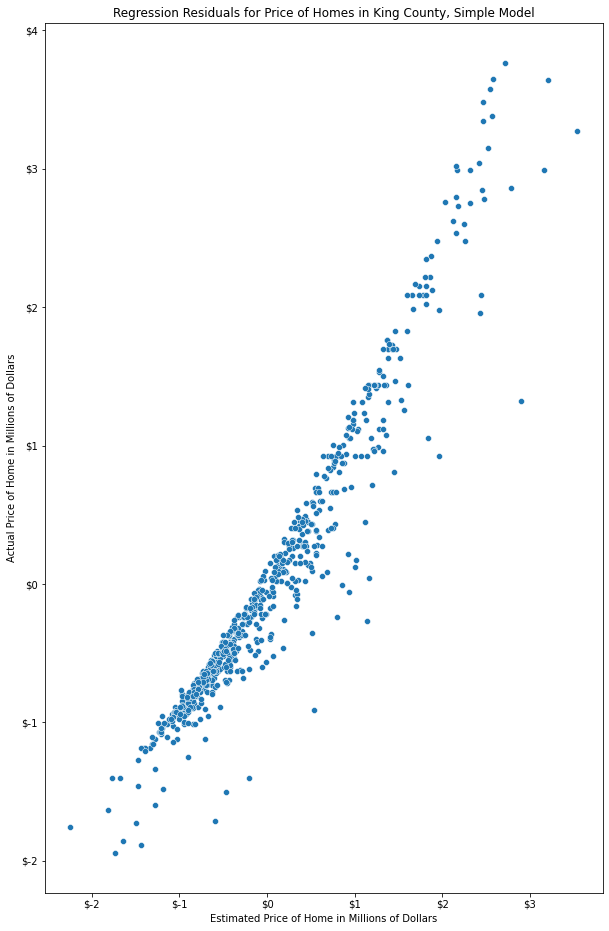

In [72]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = fourth_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

## Fifth Model
- We believe that there might be too much multicolinearity in our model due to our feature engineered variable. As such we wanted to test how the model looks with this removed.

In [73]:
X_train_fifth_model = X_train[['sqft_living', 'grade_code']]
X_test_fifth_model = X_test[['sqft_living','grade_code']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

fifth_model = LinearRegression()
fifth_model.fit(X_train_fifth_model,y_train)

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=new_df[['sqft_living', 'grade_code']],
    y=new_df.price,
    return_train_score=True,
    cv=splitter
)

fifth_predict_train = fifth_model.predict(X_train_fifth_model)
fifth_predict_test = fifth_model.predict(X_test_fifth_model)

fifth_train_RMSE = MSE(y_train,fifth_predict_train,squared = False)
fifth_test_RMSE = MSE(y_test,fifth_predict_test, squared = False)

fifth_condition_num = sm.OLS(y_train, sm.add_constant(X_train_fifth_model)).fit().condition_number

print(f'Ffith Model Train score: {fifth_model_scores["train_score"].mean()}')
print(f'Fifth Model Train RMSE: {(fifth_train_RMSE)}')
print()
print(f'Fifth Model Train Condition Number: {fifth_condition_num}')
print()
print("Fifth Model Test score: ", fifth_model_scores["test_score"].mean())
print(f'Fifth Model Test RMSE: {(fifth_test_RMSE)}')

Ffith Model Train score: 0.37308899771469123
Fifth Model Train RMSE: 0.7895404447658543

Fifth Model Train Condition Number: 2.1139728340320696

Fifth Model Test score:  0.3906099965951218
Fifth Model Test RMSE: 0.7866608442208449


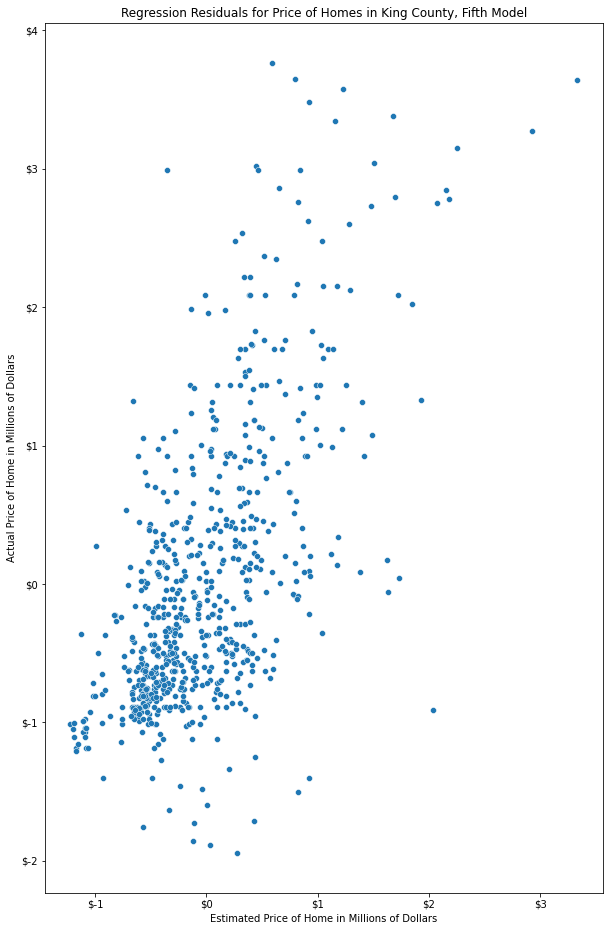

In [74]:
fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = fifth_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Fifth Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0, 4, 1)],[range(0, 4, 1)]

plt.show()

### Get the Coefficients from our Fifth Model

In [75]:
fifth_model.coef_

array([0.32466871, 0.34908435])

In [76]:
df['sqft_living'].describe()

count    2731.000000
mean     1917.726474
std       637.729194
min       770.000000
25%      1460.000000
50%      1810.000000
75%      2245.000000
max      5490.000000
Name: sqft_living, dtype: float64

In [77]:
df['grade_code'].describe()

count    2731.000000
mean        7.497254
std         0.783701
min         6.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: grade_code, dtype: float64

In [78]:
df['price'].describe()

count    2.731000e+03
mean     8.426668e+05
std      3.869865e+05
min      4.118100e+04
25%      5.700000e+05
50%      7.300000e+05
75%      1.011000e+06
max      2.301000e+06
Name: price, dtype: float64

### How to Interpret
For every:
- 638 sqft increase in house size, we expect the price on average to increase by approximately 125,000 dollars.
- .783 increase in grade code, we expect the price to increase by approximately 47,000 dollars.

We notice that taking out the price per sqft decreases our Condition Number for this model, which suggests that there is a decrease in multicolinearity.

# Data Visuals Creation

In [79]:
# From our earlier data cleaning, we are creating a dataset called data_relevant
data_relevant = df_clean.copy()

In [80]:
data_relevant = data_relevant.drop(columns=['id', 'date', 'waterfront', 'greenbelt', 'nuisance', 'view',
                                  'condition', 'grade', 'heat_source', 'sewer_system','sqft_above','sqft_basement',
                                  'yr_renovated', 'address', 'lat', 'long'])

data_relevant.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21   750000.0         3        2.0         1590      7754     1.0   
25   580000.0         3        3.0         2020      4482     1.0   
26  2000000.0         3        3.0         2700      7694     1.0   
34   785000.0         3        2.0         1350      7354     1.0   
39  1680000.0         3        2.5         5200    206039     1.0   

    sqft_garage  sqft_patio  yr_built  postal_code  grade_code  \
21          440           0      1990        98038           7   
25          600         120      1992        98031           7   
26          530         640      2006        98053           9   
34          460         120      1985        98133           7   
39         1080         670      2007        98092          10   

    condition_code  price_sqft  
21               4  471.698113  
25               3  287.128713  
26               3  740.740741  
34               5  581.481481  
39               3  323.076923

In [81]:
data_relevant.describe()

price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  2.731000e+03  2731.000000  2731.000000  2731.000000    2731.00000   
mean   8.426668e+05     3.308312     2.350787  1917.726474   22764.97803   
std    3.869865e+05     0.775164     0.590972   637.729194   51940.46294   
min    4.118100e+04     2.000000     1.000000   770.000000    1078.00000   
25%    5.700000e+05     3.000000     2.000000  1460.000000    7279.50000   
50%    7.300000e+05     3.000000     2.500000  1810.000000    9016.00000   
75%    1.011000e+06     4.000000     3.000000  2245.000000   13452.00000   
max    2.301000e+06     8.000000     7.000000  5490.000000  765753.00000   

       floors  sqft_garage   sqft_patio     yr_built   postal_code  \
count  2731.0  2731.000000  2731.000000  2731.000000   2731.000000   
mean      1.0   467.283779   243.562798  1987.685829  98054.676309   
std       0.0   207.968234   245.818677     9.918578     48.783832   
min       1.0     0.000000     0.000000  1978.000000  98001.000000   
25%       1.0   420.000000    70.000000  1980.000000  98023.000000   
50%       1.0   480.000000   180.000000  1985.000000  98042.000000   
75%       1.0   550.000000   350.000000  1992.000000  98072.000000   
max       1.0  2210.000000  2200.000000  2022.000000  98354.000000   

        grade_code  condition_code   price_sqft  
count  2731.000000     2731.000000  2731.000000  
mean      7.497254        3.551080   450.318617  
std       0.783701        0.668393   168.290002  
min       6.000000        3.000000    22.943038  
25%       7.000000        3.000000   335.714286  
50%       7.000000        3.000000   418.139535  
75%       8.000000        4.000000   542.151753  
max      12.000000        5.000000  1707.317073

## Created a column called 'in_Seattle' to determine if postal code of house was in Seattle

In [82]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

data_relevant['in_Seattle'] = np.where(data_relevant['postal_code'].isin(Seattle_postalcodes),1,0)

In [83]:
# Sanity check
data_relevant['in_Seattle'].value_counts()

0    2515
1     216
Name: in_Seattle, dtype: int64

In [84]:
Seattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 1]
Seattle_Homes['price'].describe()

count    2.160000e+02
mean     8.952342e+05
std      3.145420e+05
min      1.220500e+05
25%      6.999875e+05
50%      8.390000e+05
75%      1.010250e+06
max      2.020000e+06
Name: price, dtype: float64

In [85]:
NotSeattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 0]
NotSeattle_Homes['price'].describe()

count    2.515000e+03
mean     8.381521e+05
std      3.923093e+05
min      4.118100e+04
25%      5.600000e+05
50%      7.150000e+05
75%      1.012000e+06
max      2.301000e+06
Name: price, dtype: float64

In [86]:
data_relevant = data_relevant[data_relevant['condition_code'] >= 3]

In [87]:
data_relevant['price'].min()

41181.0

In [88]:
data_relevant['price'].max()

2301000.0

## Created average price of housing in King County based on if in Seattle or outside Seattle

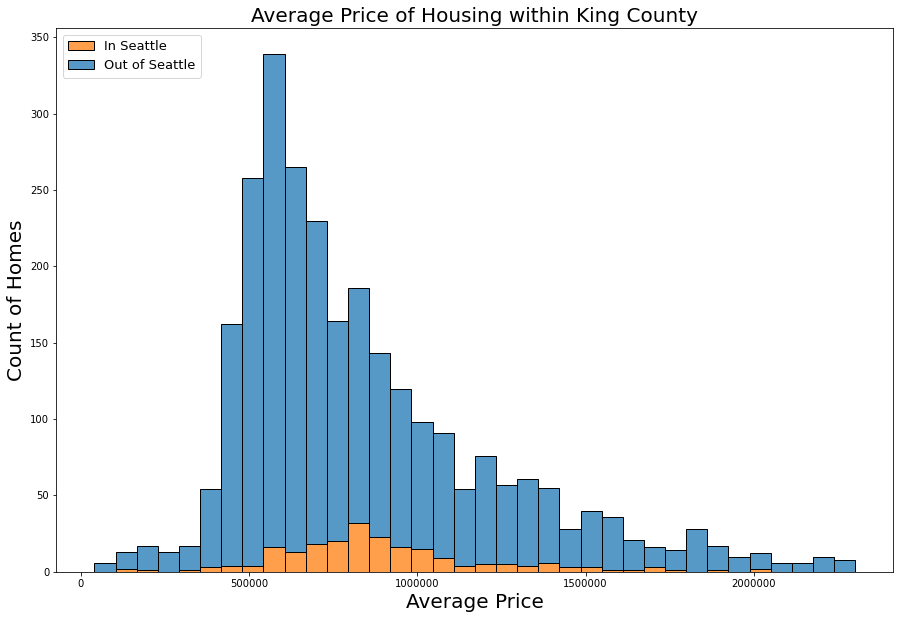

In [89]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker

sns.histplot(data_relevant, x="price", hue="in_Seattle", multiple="stack")
plt.legend(loc='upper left', labels=['In Seattle', 'Out of Seattle'], fontsize = 13)
ax.set_xlabel('Average Price', fontsize = 20)
ax.set_ylabel('Count of Homes', fontsize = 20)
ax.set_title('Average Price of Housing within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='x');

Looking at the average pricing of homes within King County, we see that significantly more families are purchasing homes outside of Seattle compared to purchases within the city. The average price of realty within Seattle is greater than that outside of the city as well which follows the trend of urban realty being more expensive than that of suburb communities.

## Created average price per square feet vs. condition code of houses
- We wanted to compare the average price per square foot versus the condition code of the houses based on the locations of the houses.

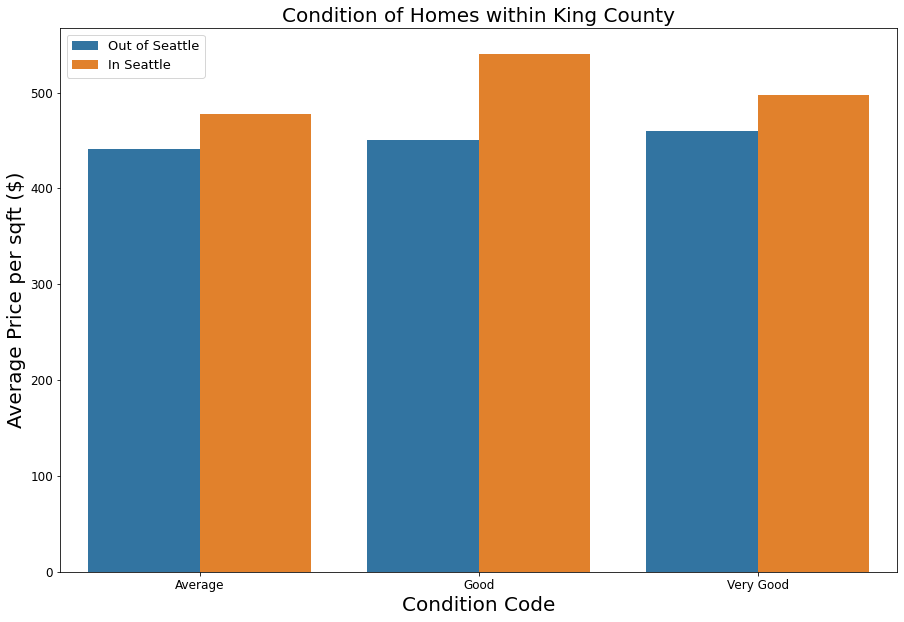

In [90]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["condition_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci = None)
ax.legend(loc='upper left', labels=['Out of Seattle', 'In Seattle'], fontsize = 13)
ax.set_xlabel('Condition Code', fontsize = 20)
ax.set_ylabel('Average Price per sqft ($)', fontsize = 20)
ax.set_title('Condition of Homes within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.set_xticklabels(['Average','Good', 'Very Good'])
ax.tick_params(axis='both', which='major', labelsize=12);

This model focused on homes that were of Average or greater condition to ensure that the families, especially the children are living in suitable conditions and not in homes of disrepair. Homes outside of Seattle have seen a steady incline in price as the conditions increase, whereas those within the city of Seattle have a greater variation in price. 

## Created average price per square feet vs building grades of homes
- We wanted to compare the average price per square feet against building grade values based on location of the houses.

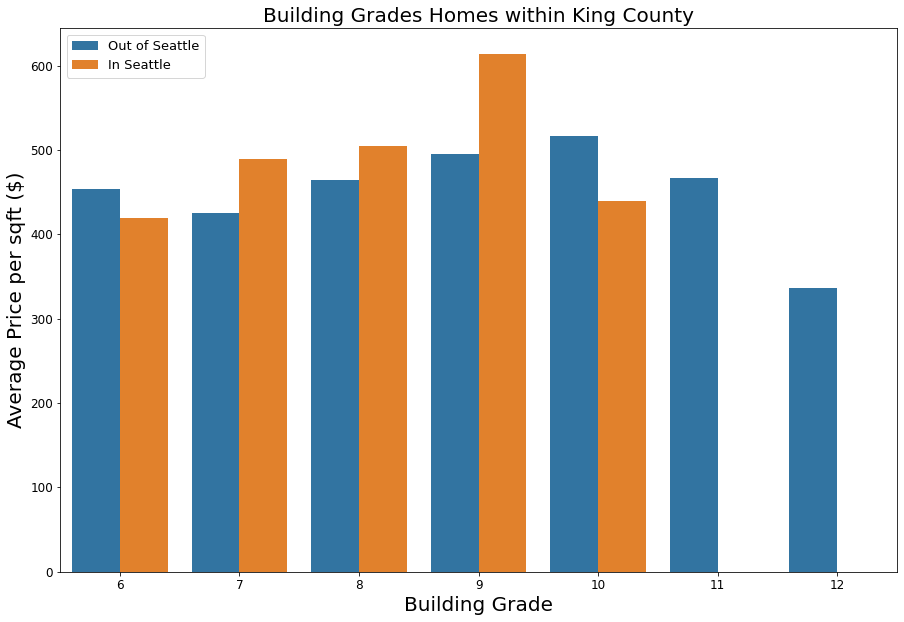

In [91]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["grade_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci = None)
ax.legend(loc='upper left', labels=['Out of Seattle', 'In Seattle'], fontsize = 13)
ax.set_xlabel('Building Grade', fontsize = 20)
ax.set_ylabel('Average Price per sqft ($)', fontsize = 20)
ax.set_title('Building Grades Homes within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

This model focused on homes that had a building grade of 6 and above since the grade 6 is the lowest achievable grade that meetings King County building codes. There is an upward trend of average price per square foot as the building grade increases. However, there are only homes outside of Seattle that are of grade 11 and 12 which can be attributed to real estate is cheaper out of the big city or families customizings their homes more in suburban areas whereaas urban areas have more red tape and limitations. In addition, homes of higher grade begin to approach mansion level, and with more property, the bigger the house can be, which may not be possible within the city since there is less space. 

## Creating a map of the dataset

### New datasets with the In Seattle vs Out of Seattle Breakdown

In [92]:
#Create new dataset for mapping dataset
mapdata = df_clean.copy()

In [93]:
#Create new column noting whether home is in or out of Seattle 
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

mapdata['in_Seattle'] = np.where(mapdata['postal_code'].isin(Seattle_postalcodes),1,0)
mapdata.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
21  2310000170  2/28/2022   750000.0         3        2.0         1590   
25  2095600170  10/8/2021   580000.0         3        3.0         2020   
26  8682282030   5/4/2022  2000000.0         3        3.0         2700   
34  5727500011  11/3/2021   785000.0         3        2.0         1350   
39  1421059003  8/25/2021  1680000.0         3        2.5         5200   

    sqft_lot  floors waterfront greenbelt  ... yr_built yr_renovated  \
21      7754     1.0         NO       YES  ...     1990            0   
25      4482     1.0         NO        NO  ...     1992            0   
26      7694     1.0         NO        NO  ...     2006            0   
34      7354     1.0         NO        NO  ...     1985            0   
39    206039     1.0         NO        NO  ...     2007            0   

                                              address        lat       long  \
21  27307 226th Avenue Southeast, Maple Valley, Wa...  47.357065 -122.04067   
25  22609 102nd Place Southeast, Kent, Washington ...  47.399470 -122.20413   
26  23837 NE Adair Rd, Redmond, Washington 98053, ...  47.708760 -122.02073   
34  16710 Meridian Avenue North, Shoreline, Washin...  47.751020 -122.33447   
39  15916 Southeast 326th Street, Auburn, Washingt...  47.310595 -122.12938   

   postal_code  grade_code  condition_code  price_sqft  in_Seattle  
21       98038           7               4  471.698113           0  
25       98031           7               3  287.128713           0  
26       98053           9               3  740.740741           0  
34       98133           7               5  581.481481           1  
39       98092          10               3  323.076923           0  

[5 rows x 30 columns]

In [94]:
#Create copy of the map dataset
df_seattle = mapdata.copy()

#Create new dataset for homes only in Seattle
Seattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 1]
Seattle_Homes.shape

(216, 30)

Of the 2,731 homes within the dataset, there are 216 homes in the city of Seattle - roughly 8% of the dataset. 

In [95]:
#Create copy of the map dataset
df_notseattle = mapdata.copy()

#Create new dataset for homes only in Seattle
NotSeattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 0]
NotSeattle_Homes.shape

(2515, 30)

Of the 2,731 homes within the dataset, there are 2,515 homes out of Seattle city bounds - roughly 92% of the dataset. 

### Mapping the homes

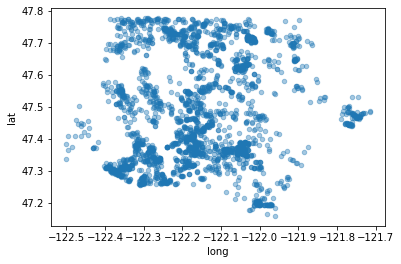

In [96]:
#Map of all of the datapoints
mapdata.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show();

In [97]:
#Select only the relevant columns for mapping
seattle_locations = Seattle_Homes[["lat", "long", "id"]]

In [98]:
#Select only the relevant columns for mapping
notSeattle_locations = NotSeattle_Homes[["lat", "long", "id"]]

In [99]:
#Create an interactive map of homes
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement

#Create a blank map
map = folium.Map(location=[notSeattle_locations.lat.mean(), 
                           notSeattle_locations.long.mean()], zoom_start=9, control_scale=True)

#Index markers for homes Out of Seattle
for index, location_info in notSeattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)

#Index markers for homes In Seattle
for index, location_info in seattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='orange',icon='none')).add_to(map)

#County outline coordinates    
king_county = [
    [47.777799, -121.998473],
    [47.777799, -122.419374],
    [47.734022, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.533756],
    [47.324233, -122.533756],
    [47.324233, -122.419374],
    [47.257529, -122.419374],
    [47.257529, -122.249917],
    [47.161605, -121.924595],
    [47.161605, -121.404507],
    [47.373455, -121.404507],
    [47.600453, -121.131500],
    [47.777799, -121.131500],
    [47.777799, -121.998473],
]

# Plot county lines using coordinates
my_PolyLine=folium.PolyLine(locations=king_county,weight=3, color = 'black')
map.add_child(my_PolyLine)


#Create a draggable legend
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:4px; padding: 4px; font-size:14px; right: 15px; bottom: 10px;'>

<div class='legend-title'>Legend</div>

<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:orange;opacity:1.0;'></span>In Seattle</li>
    <li><span style='background:cadetblue;opacity:1.0;'></span>Out of Seattle</li>
    <li><span style='background:black;opacity:1.0;'></span>King County Outline</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 2px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 14px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map.get_root().add_child(macro)

map

The dataset consisted of 2,731 homes with the numerous fixed factors and price outliers removed. The homes within the city of Seattle is noted in orange markers and the homes outside of Seattle are noted in blue. The outline of King County can be seen noted in a black line. 

## Conclusion 
Our model accounted for approximately 37% of the variability seen in the price of the home after focusing on two main factors, square foot of liveable space and the building grade. As the amount of space in the home and building grade both increase, the average price of the home is expected to increase as well. To be more precise, with one square food increase in liveable space, you should expect to see an increase in the price of the home on average by about two hundred dollars. With one grade increase in the building grade, you should expect to see an increase in the price of the home on average by about sixty thousand dollars.

## Recommendations
* **Plant your roots in a town outside of Seattle**
    * On average the prices of homes outside of Seattle are lower compared to those within the city of Seattle, which leaves your bank account with more money. Signficantly more families purchase homes outside of Seattle so you can surround yourself with other growing families in a family friendly neighorhood as well. 

* **Opt for a home with more liveable square feet**
    * Although adding more square footage means more dollar signs on the price tag of the home, a home with a larger space would be advantageous to a growing family. A larger home allows each family member to maintain their own space within a single household. 

* **Focus on homes with higher condition code or building grade**
    * As both the condition code and building grade increase, the value of a home increases as well. The higher quality and design of the home, the stronger it will be to withstand the forces of nature and your children. A quality home has been maintained properly which means less repairs for you and decreased chances of injuries due to the deferred maintanence or home deterioration.
  
    
From the start, our focal point was the price of a home. As such, we believe these results would benefit both real estate agencies and families should they be taken into consideration. 

## Future Insights & Next Steps
- Consider changes in the Housing Market.
- Explore how the changes in demographics impact real-estate trends and the local area. 
- Consider changes in interest rates and how this impacts purchaser's ability to obtain a mortgage and real estate demand. 